# Nibabel Exercises

## Exercise 1

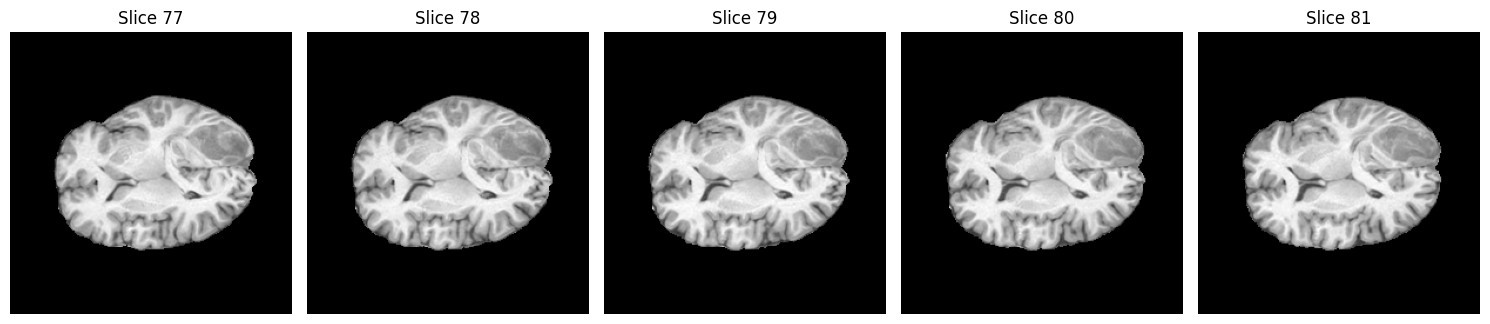

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

file_path = "BraTS2021_00495_t1.nii.gz"
mri = nib.load(file_path).get_fdata()

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
  slice_index = mri.shape[2] // 2 + i

  ax = axes[i]

  ax.imshow(mri[:, :, slice_index], cmap='gray')
  ax.set_title(f'Slice {slice_index}')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Exercise 2

In [ ]:
def plot_slices(volume, indices):
  fig, axes = plt.subplots(1, len(indices), figsize=(15, 5))

  for i in indices:
    ax = axes[i]
    ax.imshow(volume[:, :, i], cmap='gray')
    ax.set_title(f'Slice {i}')
    ax.axis('off')

  plt.tight_layout()
  plt.show()

## Exercise 3

In [ ]:
def normalize_slice_wise(mri):
    normalized_mri = np.zeros_like(mri)
    for i in range(mri.shape[-1]):
        data = mri[:, :, i]
        s_min, s_max = data.min(), data.max()

        if s_max - s_min > 0:
            normalized_mri[:, :, i] = (data - s_min) / (s_max - s_min)

    return normalized_mri